- EDA
- Featuring & Preproccesing
- Modeling
- Subscribe

In [3]:
import pandas as pd
import numpy as np
# библиотеки вывода графических изображений
import matplotlib.pyplot as plt
import seaborn as sns
# импорт предупреждений и отключение части из них
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')
train_labels = pd.read_csv('Train_labels.csv')

In [5]:
train_data.shape, test_data.shape

((59400, 40), (14850, 40))

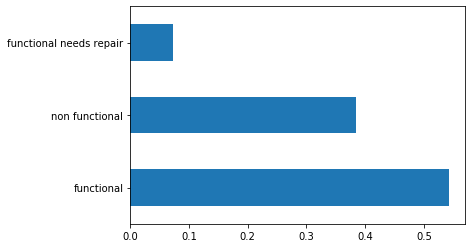

In [6]:
# по train_label выборке определяем доли колонок в разных состояниях и визуализируем
train_labels.status_group.value_counts(normalize = True).plot.barh()

# Объединение дата сетов

In [7]:
# установка признаков, которые делят объединенный дата сет на тренировочную и тестовую
train_data['is_train'] = True
test_data['is_train'] = False
# объединение
data = pd.concat([train_data, test_data])
data.shape

(74250, 41)

### Пропущенные значения

In [8]:
(100*data.isnull().sum()/data.shape[0]).sort_values(ascending = False)
# найденое количество NaN (это несовсем нулевые) ячеек разделили на shape, чтобы получить доли. 
# Умножили на 100. Отсортировали по убыванию

scheme_name              47.485522
scheme_management         6.526599
installer                 6.103704
funder                    6.065993
public_meeting            5.595960
permit                    5.108418
subvillage                0.632997
ward                      0.000000
lga                       0.000000
district_code             0.000000
region_code               0.000000
region                    0.000000
num_private               0.000000
basin                     0.000000
wpt_name                  0.000000
latitude                  0.000000
longitude                 0.000000
gps_height                0.000000
date_recorded             0.000000
amount_tsh                0.000000
population                0.000000
is_train                  0.000000
recorded_by               0.000000
water_quality             0.000000
waterpoint_type           0.000000
source_class              0.000000
source_type               0.000000
source                    0.000000
quantity_group      

### Знакомство с переменными

In [9]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'is_train'],
      dtype='object')

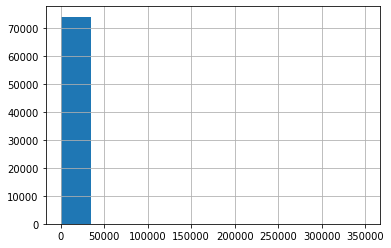

In [10]:
data['amount_tsh'].hist()

In [11]:
data['amount_tsh'].value_counts(normalize = True).iloc[:20] # вывод первых 20 строк
# 70% пропусков (нулевых значений), остальные 30% редко встречаются

0.0       0.700997
500.0     0.052175
50.0      0.041791
1000.0    0.025024
20.0      0.024404
200.0     0.020418
100.0     0.013926
10.0      0.013401
30.0      0.012512
2000.0    0.011879
250.0     0.009845
300.0     0.009266
5000.0    0.007529
5.0       0.006343
25.0      0.005993
3000.0    0.005724
1200.0    0.004337
1500.0    0.003286
6.0       0.003111
600.0     0.002949
Name: amount_tsh, dtype: float64

In [12]:
# ввели доп признак нулевого или неулевого значения фичи 'amount_tsh'
data['amount_tsh_is_null'] = data['amount_tsh'] == 0

In [13]:
data['amount_tsh_is_null'].value_counts(normalize = True)

True     0.700997
False    0.299003
Name: amount_tsh_is_null, dtype: float64

In [14]:
# следующая переменная
data['date_recorded'].value_counts().iloc[:30]

2011-03-17    695
2011-03-15    694
2013-02-03    684
2011-03-16    650
2011-03-14    649
2011-03-18    627
2011-03-19    576
2013-02-04    575
2013-01-29    570
2011-03-04    562
2013-02-14    550
2013-01-24    546
2013-01-30    533
2011-03-05    532
2011-03-09    522
2011-03-11    522
2011-03-23    520
2013-03-15    516
2013-02-15    516
2013-01-18    513
2013-02-16    505
2013-01-23    498
2011-03-12    493
2011-03-24    490
2013-03-19    486
2011-03-30    486
2011-03-03    478
2013-02-26    475
2013-02-18    473
2013-02-13    470
Name: date_recorded, dtype: int64

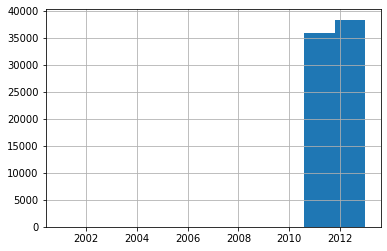

In [15]:
# значения фичи 'date_recorded' преобразуем в тип дата
data['date_recorded'] = pd.to_datetime(data['date_recorded'])
# для работы с элементами типа дата, создаем новые признаки год и месяц
data['year_recorded'] = data['date_recorded'].dt.year
data['month_recorded'] = data['date_recorded'].dt.month
data['year_recorded'].hist()

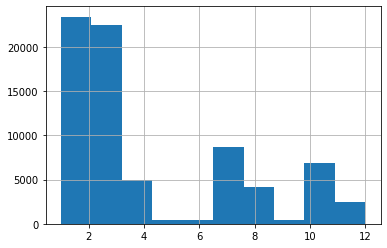

In [16]:
data.month_recorded.hist()

In [17]:
data[['longitude', 'latitude']]

,longitude,latitude
0,34.938093,-9.856322
1,34.698766,-2.147466
2,37.460664,-3.821329
3,38.486161,-11.155298
4,31.130847,-1.825359
...,...,...
14845,38.852669,-6.582841
14846,37.451633,-5.350428
14847,34.739804,-4.585587
14848,35.432732,-10.584159


In [18]:
data[['longitude', 'latitude']].isnull().sum() # проверка на NaN

longitude    0
latitude     0
dtype: int64

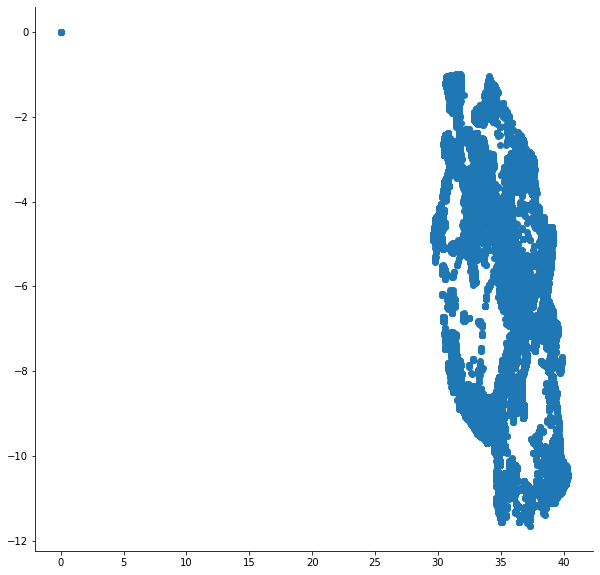

In [19]:
# Созданиеновой фигуры размером 10 Х 10
plt.figure(figsize=(10, 10))
# Определяем массивы с координатами в нашем случае для отображения
plt.scatter(data['longitude'], data['latitude'])
sns.despine() # убирает рамку каринки, оставляет только оси
plt.show()

### Теоретически координаты расположения колонок должны были определить контуры границ Танзании. Этого не произошло. Предполагаем, что в координатах есть пропуски. 

In [20]:
data[data.longitude == 0] # проверка на 0

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,is_train,amount_tsh_is_null,year_recorded,month_recorded
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,...,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,True,True,2013,2
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True,True,2011,8
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,True,2013,1
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,...,enough,shallow well,shallow well,groundwater,other,other,True,True,2013,1
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,...,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,True,True,2012,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14649,30454,0.0,2011-08-08,Nyamigogo,0,MASWI,0.0,-2.000000e-08,Husein,0,...,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,False,True,2011,8
14676,44766,0.0,2013-02-16,Dwsp,0,DWE,0.0,-2.000000e-08,Imalanota,0,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,False,True,2013,2
14766,56279,0.0,2012-11-04,Government Of Tanzania,0,RWE,0.0,-2.000000e-08,Ofisini,0,...,insufficient,lake,river/lake,surface,communal standpipe multiple,communal standpipe,False,True,2012,11
14831,37994,0.0,2012-10-26,Hesawa,0,DWE,0.0,-2.000000e-08,Kwa Masilili,0,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,False,True,2012,10


### Пытаемся заполнить пропуски, ищем связь с конкретным местом нахождения колонки, например 'subvillage', 'region', 'region_code', 'district_code'

In [21]:
len(data.subvillage.unique()) # определяем количество уникальных значений 'subvillage', 
#'region', 'region_code', 'district_code'
# 21426 - 'subvillage', 20 - 'district_code', 27 -  'region_code', 21 -region

21426

In [22]:
# определяем среднее значение координат. В связи с большим количеством координат не равным, но очень
# близким к 0, которое дало большую погрешность код 
# average_coordinates_subvillage = data.groupby(
#    'subvillage')[['longitude', 'latitude']].mean() изменен на:
average_coordinates_subvillage = data[data['longitude'] != 0.0].groupby(
    'subvillage')[['longitude', 'latitude']].mean()
average_coordinates_subvillage

,longitude,latitude
subvillage,,
##,31.460087,-1.553813
'A' Kati,33.731741,-1.902525
1,32.986332,-2.455440
10C,32.170419,-4.677651
18,32.134800,-4.582413
...,...,...
Zumve,33.192803,-3.639579
Zunga,38.366623,-6.346883
Zunguni,38.837185,-7.144544


In [23]:
# в выборке по условию отображаем (map) средние значения координат
data.longitude[data['longitude'] == 0] = data[data['longitude'] == 0].subvillage.map(
    average_coordinates_subvillage.longitude)
data.latitude[data['latitude'] == 0] =  data[data['latitude'] == 0].subvillage.map(
    average_coordinates_subvillage.latitude)

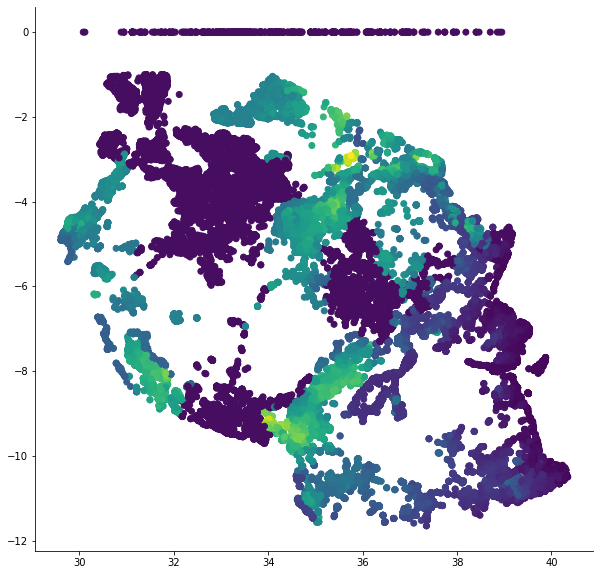

In [24]:
# Созданиеновой фигуры размером 10 Х 10
plt.figure(figsize=(10, 10))
# Определяем массивы с координатами в нашем случае для отображения
plt.scatter(data['longitude'], data['latitude'], c = data.gps_height) # добавили высоты
sns.despine() # убирает рамку каринки, оставляет только оси
plt.show()

In [25]:
data[data.latitude == -2.000000e-08] # проверка на 0
data.longitude.isnull().sum()
# результат 1410 объясняет наличие на графике горизонтальной полосы в районе нулевых значений
# повлияет ли это на результат в целом посмотрим далее

1410

In [26]:
# анализируем пременнную 'funder'
data['funder'].value_counts(normalize = True)
# очень много пропусков

Government Of Tanzania    0.162002
Danida                    0.056018
Hesawa                    0.039888
Rwssp                     0.024417
World Bank                0.024388
                            ...   
Padi                      0.000014
Kdc                       0.000014
Kkkt Imbaseny             0.000014
Qwekwin                   0.000014
Cdft                      0.000014
Name: funder, Length: 2140, dtype: float64

In [27]:
data['funder'].isnull().sum()#/data.shape[0]

4504

### Заполнение пропусков "funder"  методом KNN

In [28]:
# закоментированные строки были отработаны на фиче 'funder', после чего была написана функция
# fill_values_with_neighbors для автоматизации заполнения пропусков в остальных колонках

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# LabelEncoder кодирует строковые значения как целочисленные от 0 до (общее количество строковых - 1)
from sklearn.preprocessing import LabelEncoder

#knn = KNeighborsClassifier()
#le = LabelEncoder()

# создаем столбец, куда записываем закодированные строчные из 'funder'
#data['funder_encoder'] = le.fit_transform(data['funder'].astype(str))

# формируем условие, при котором исключаем из объединенного data пустые значения 'funder', 
# пустые значения 'longitude', 'latitude', и используем только выборку 'is_train'
#condition = (-data.funder.isnull()) & (data['is_train']) & (
    #-data.longitude.isnull())  & (-data.latitude.isnull())

# обучение метода, где в качестве целевой переменной выбран признак 'funder_encoder'
#knn.fit(
   #X=data[['longitude', 'latitude']][condition], 
   # y=data['funder_encoder'][condition])

In [29]:
condition2 = (data.funder.isnull()) & (
    data.longitude.isnull())  & (data.latitude.isnull())
#data['funder_encoder'][data.funder.isnull()] = knn.predict(
 #   data[['longitude', 'latitude']][data.funder.isnull()])
data[['longitude', 'latitude']][data.funder.isnull()].isnull().sum()
# Заполнение предсказанными значениями широты/долготыы по признаку funder неудалось.
# Причина  - пропуски в самом funder, т.е. ппризнак содержит незаполненные значения координат

longitude    10
latitude      0
dtype: int64

In [30]:
# вариант решения  - заполнить оставшиеся пропуски средними значениями всех координат.
#  из-за малого количества пропусков (longitude 10) погрешность будет очень мимнимальна
data.longitude.fillna(data['longitude'].mean(), inplace = True)
data.latitude.fillna(data['latitude'].mean(), inplace = True)
data[['longitude', 'latitude']][data.funder.isnull()].isnull().sum()

longitude    0
latitude     0
dtype: int64

In [31]:
#knn.predict(data[['longitude', 'latitude']][data.funder.isnull()])
#data['funder_encoder'][data.funder.isnull()] = knn.predict(
    #data[['longitude', 'latitude']][data.funder.isnull()])

In [32]:
#data['funder_encoder'].isnull().sum()/data.shape[0]
#knn.predict(data[['longitude', 'latitude']])
#knn.predict(data[['longitude', 'latitude']][data.funder.isnull()])

In [33]:
def fill_value_with_neighbours(column_name, data=data, is_categorial=True):
       
    if is_categorial:
        knn = KNeighborsClassifier()
        le = LabelEncoder()
        # создаем столбец, куда записываем закодированные строчные из 'funder'
        data[f'{column_name}_encoded'] = le.fit_transform(data[column_name].astype(str))
        y = data[f'{column_name}_encoded']
    else:
        knn = KNeighborsRegressor()
        y = data[column_name]
    # формируем условие, при котором исключаем из объединенного data пустые значения 'funder',
    # пустые значения 'longitude', 'latitude', и используем только выборку 'is_train'
    condition = (-data[column_name].isnull()) & (data['is_train']) & (
    -data.longitude.isnull())  & (-data.latitude.isnull())
    # обучение метода, где в качестве целевой переменной выбран признак 'funder_encoder'
    
    X = data[['longitude', 'latitude']]
    knn.fit(X=X[condition], y=y[condition])
    
    if is_categorial:
        data[f'{column_name}_encoded'][data[column_name].isnull()] = knn.predict(
            X[data[column_name].isnull()])
    else:
        data[column_name][data[column_name].isnull()] = knn.predict(
           X[data[column_name].isnull()])


In [34]:
fill_value_with_neighbours('funder')
data['funder_encoded'].isnull().sum()

0

### Переменная 'gps_height'

In [35]:
# статистика
data.gps_height.value_counts()
# много н2улевых значений

 0       25649
-16         71
-15         69
-13         68
-19         65
         ...  
 2457        1
 2091        1
 2536        1
 2408        1
 2015        1
Name: gps_height, Length: 2456, dtype: int64

In [36]:
# Нулевые значения заменяем на NaN для удобства работы функции fill_value_with_neighbours
data['gps_height'][data.gps_height==0] = np.NAN

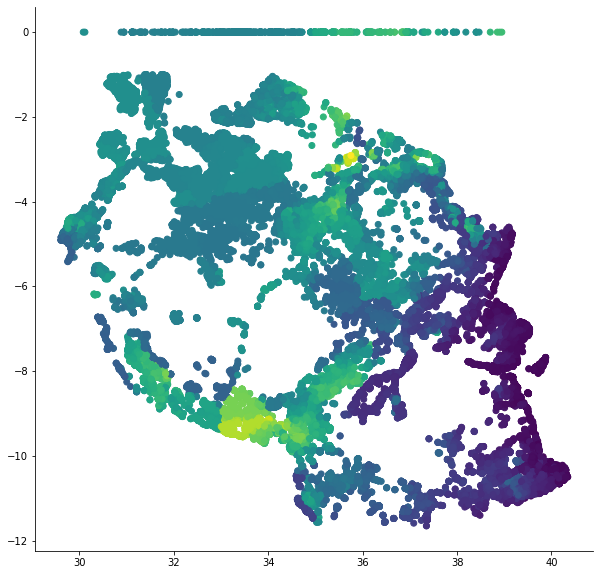

In [37]:
# вызов функции
fill_value_with_neighbours('gps_height', is_categorial=False)

# Проверка графиком
# Создание новой фигуры размером 10 Х 10
plt.figure(figsize=(10, 10))
# Определяем массивы с координатами в нашем случае для отображения
plt.scatter(data['longitude'], data['latitude'], c = data.gps_height) # добавили высоты
sns.despine() # убирает рамку каринки, оставляет только оси
plt.show()

### Анализируем остальные переменные, определяем тип (категориальная или числовая)

In [38]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'is_train', 'amount_tsh_is_null',
       'year_recorded', 'month_recorded', 'funder_encoded'],
      dtype='object')

In [39]:
# Первое, что приходит в голову анализировать кажлую перменную, что и было сделано. Но ...
# fillfill_value_with_neighbours работает с пропусками типа NaN. Определить, какие переменные
# содержат Nan помогает следующая строка:
# (100*data.isnull().sum()/data.shape[0]).sort_values(ascending = False)
# которая была применена в разделе "Пропущенные значения"
# С учетом результатов выполнения был откорректирован список to_fill

to_drop = ['id', 'date_recorded', 'num_private', 'recorded_by', 'public_meeting']
to_fill_num =['population']
to_fill = ['funder', 'installer', 'subvillage', 'scheme_management', 'scheme_name',
           'public_meeting', 'permit'] #, 'wpt_name'

# population попал в категорию is_categorical = False
# кроме того значениям этой переменной меньше 2 принудительно присваеваем NaN и вызываем ф-цию
                  
data['population'][data.population<=0]  = np.NAN
#data['population'].isnull().sum()
fill_value_with_neighbours('population', is_categorial=False)

# В переменной 'wpt_name' 4440 значений 'none'. Принудительно меняем на NaN
#data['wpt_name'][data.wpt_name == 'none'] = np.NaN

In [40]:
# импортируем progress bar
from tqdm import tqdm_notebook

# формируем цикл по заполнению пропущенных значений (список to_fill)
for feature_name in tqdm_notebook(to_fill):
    fill_value_with_neighbours(feature_name, is_categorial=True)

In [41]:
# произвели проверку корректности результатов выполнения функции
(100*data.isnull().sum()/data.shape[0]).sort_values(ascending = False)

# Казалось бы, ничего не сработало. Результаты сдержат пустые значения. Но...
# вспомним, что категориальные переменные были заменены на числовые значения и добавлены 
# в одноименные столбцы + _encoder)) Злесь все в порядке. Пустых значений не осталось.
# Категориальные переменные с пустыми значениями можно смело удалять.

scheme_name                  47.485522
scheme_management             6.526599
installer                     6.103704
funder                        6.065993
public_meeting                5.595960
permit                        5.108418
subvillage                    0.632997
region_code                   0.000000
recorded_by                   0.000000
population                    0.000000
ward                          0.000000
lga                           0.000000
district_code                 0.000000
permit_encoded                0.000000
region                        0.000000
extraction_type               0.000000
basin                         0.000000
num_private                   0.000000
wpt_name                      0.000000
latitude                      0.000000
longitude                     0.000000
gps_height                    0.000000
date_recorded                 0.000000
amount_tsh                    0.000000
construction_year             0.000000
extraction_type_group    

In [42]:
# добавление в список на удаление
to_drop = ['id', 'date_recorded', 'num_private', 'recorded_by', 'public_meeting', 
           'funder', 'installer', 'subvillage', 'scheme_management', 'scheme_name',
           'public_meeting', 'permit']  #, 'wpt_name'
data.drop(to_drop, axis=1, inplace=True)

In [43]:
# проверка корректности удаления
data.head()

,amount_tsh,gps_height,longitude,latitude,wpt_name,basin,region,region_code,district_code,lga,...,amount_tsh_is_null,year_recorded,month_recorded,funder_encoded,installer_encoded,subvillage_encoded,scheme_management_encoded,scheme_name_encoded,public_meeting_encoded,permit_encoded
0,6000.0,1390.0,34.938093,-9.856322,none,Lake Nyasa,Iringa,11,5,Ludewa,...,False,2011,3,1548,1706,13116,7,2388,1,0
1,0.0,1399.0,34.698766,-2.147466,Zahanati,Lake Victoria,Mara,20,2,Serengeti,...,True,2013,3,522,610,17596,2,2385,0,1
2,25.0,686.0,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,21,4,Simanjiro,...,False,2013,2,924,2296,10096,7,2261,1,1
3,0.0,263.0,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,...,True,2013,1,1961,2078,9998,7,1130,1,1
4,0.0,1328.8,31.130847,-1.825359,Shuleni,Lake Victoria,Kagera,18,1,Karagwe,...,True,2011,7,20,133,8583,7,204,1,1


In [44]:
# формируем список категориальных признаков для перекодирования в цифру
to_encode = ['basin', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'construction_year', 'extraction_type', 'extraction_type_group', 
       'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity' ,'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'wpt_name']

In [45]:
# списки для кодирования  и удаления преобразуем в множества и находим их разность
# чтобы избежать дублирования и включить только существующие признаки в списке 'to_encode'
to_encode = list(set(to_encode) - set(to_drop))
to_encode

['extraction_type_class',
 'district_code',
 'source_class',
 'quantity_group',
 'payment_type',
 'basin',
 'quality_group',
 'source_type',
 'ward',
 'region',
 'payment',
 'waterpoint_type_group',
 'extraction_type_group',
 'construction_year',
 'region_code',
 'lga',
 'waterpoint_type',
 'source',
 'management',
 'extraction_type',
 'quantity',
 'water_quality',
 'management_group',
 'wpt_name']

In [46]:
# вызов LabelEncoder()
le = LabelEncoder()

# Организация цикла с прогресс баром для последовательного перекодирования признаков
for feature_name in tqdm_notebook(to_encode):
    data[f'{feature_name}_encoded'] = le.fit_transform(data[feature_name])

In [47]:
data.head()

,amount_tsh,gps_height,longitude,latitude,wpt_name,basin,region,region_code,district_code,lga,...,region_code_encoded,lga_encoded,waterpoint_type_encoded,source_encoded,management_encoded,extraction_type_encoded,quantity_encoded,water_quality_encoded,management_group_encoded,wpt_name_encoded
0,6000.0,1390.0,34.938093,-9.856322,none,Lake Nyasa,Iringa,11,5,Ludewa,...,10,51,1,8,7,3,1,6,4,45683
1,0.0,1399.0,34.698766,-2.147466,Zahanati,Lake Victoria,Mara,20,2,Serengeti,...,19,103,1,5,11,3,2,6,4,45426
2,25.0,686.0,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,21,4,Simanjiro,...,20,108,2,0,7,3,1,6,4,17767
3,0.0,263.0,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,...,25,87,2,3,7,14,0,6,4,45537
4,0.0,1328.8,31.130847,-1.825359,Shuleni,Lake Victoria,Kagera,18,1,Karagwe,...,17,26,1,5,1,3,3,6,1,43411


In [48]:
# удаление категориальных переменных
data.drop(to_encode, axis=1, inplace=True)

In [49]:
data.head()

,amount_tsh,gps_height,longitude,latitude,population,is_train,amount_tsh_is_null,year_recorded,month_recorded,funder_encoded,...,region_code_encoded,lga_encoded,waterpoint_type_encoded,source_encoded,management_encoded,extraction_type_encoded,quantity_encoded,water_quality_encoded,management_group_encoded,wpt_name_encoded
0,6000.0,1390.0,34.938093,-9.856322,109.0,True,False,2011,3,1548,...,10,51,1,8,7,3,1,6,4,45683
1,0.0,1399.0,34.698766,-2.147466,280.0,True,True,2013,3,522,...,19,103,1,5,11,3,2,6,4,45426
2,25.0,686.0,37.460664,-3.821329,250.0,True,False,2013,2,924,...,20,108,2,0,7,3,1,6,4,17767
3,0.0,263.0,38.486161,-11.155298,58.0,True,True,2013,1,1961,...,25,87,2,3,7,14,0,6,4,45537
4,0.0,1328.8,31.130847,-1.825359,264.0,True,True,2011,7,20,...,17,26,1,5,1,3,3,6,1,43411


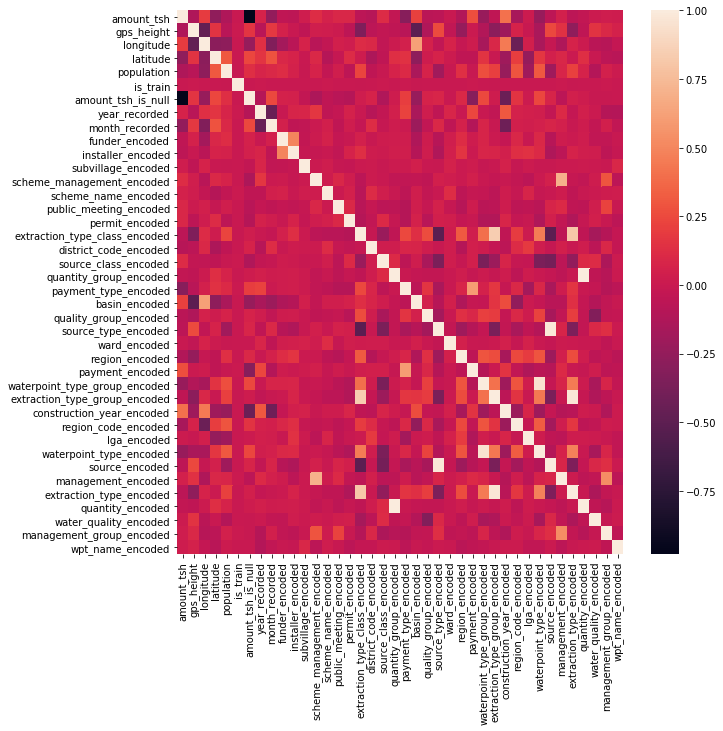

In [50]:
# построения хитмапа по корреляции переменных
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(method='spearman'))
plt.show()
# из графика видно, что корреляция присутствует. Необходимо заняться удалением сильно
# коррелированных признаков 

In [51]:
to_encode = ['basin', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'construction_year', 'extraction_type', 'extraction_type_group', 
       'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity' ,'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'wpt_name']
to_encode = [feature + '_encoded' for feature in to_encode ]
data[to_encode]

,basin_encoded,region_encoded,region_code_encoded,district_code_encoded,lga_encoded,ward_encoded,construction_year_encoded,extraction_type_encoded,extraction_type_group_encoded,extraction_type_class_encoded,...,water_quality_encoded,quality_group_encoded,quantity_encoded,quantity_group_encoded,source_encoded,source_type_encoded,source_class_encoded,waterpoint_type_encoded,waterpoint_type_group_encoded,wpt_name_encoded
0,1,3,10,5,51,1429,40,3,1,0,...,6,2,1,1,8,6,0,1,1,45683
1,4,9,19,2,103,1581,51,3,1,0,...,6,2,2,2,5,3,1,1,1,45426
2,5,8,20,4,108,1629,50,3,1,0,...,6,2,1,1,0,1,1,2,1,17767
3,7,12,25,17,87,1576,27,14,10,5,...,6,2,0,0,3,0,0,2,1,45537
4,4,4,17,1,26,1692,0,3,1,0,...,6,2,3,3,5,3,1,1,1,43411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,8,14,5,1,3,2087,29,7,4,2,...,6,2,1,1,6,4,1,1,1,30976
14846,5,20,3,7,33,1454,35,8,5,1,...,4,4,2,2,7,5,0,4,3,1352
14847,0,18,12,2,109,2000,51,3,1,0,...,6,2,2,2,0,1,1,1,1,1821
14848,1,16,9,2,111,1072,50,3,1,0,...,6,2,2,2,6,4,1,1,1,14467


In [52]:
# определяем частоту появления уникальных значений переменных. Видно, что значения зашкаливают.
# Поэтому для всех значений, которые превышают 27, меняем на частоту появления
#print(f'Feature: {feature}, Unique value: {len(data[feature].unique())}')

for feature in to_encode:
   
    if len(data[feature].unique()) > 27:
        frequency_encoder = data[feature].value_counts(normalize=True)
        data[feature] = data[feature].map(frequency_encoder)

In [53]:
data

,amount_tsh,gps_height,longitude,latitude,population,is_train,amount_tsh_is_null,year_recorded,month_recorded,funder_encoded,...,region_code_encoded,lga_encoded,waterpoint_type_encoded,source_encoded,management_encoded,extraction_type_encoded,quantity_encoded,water_quality_encoded,management_group_encoded,wpt_name_encoded
0,6000.0,1390.0,34.938093,-9.856322,109.0,True,False,2011,3,1548,...,10,0.009253,1,8,7,3,1,6,4,0.059798
1,0.0,1399.0,34.698766,-2.147466,280.0,True,True,2013,3,522,...,19,0.012189,1,5,11,3,2,6,4,0.013926
2,25.0,686.0,37.460664,-3.821329,250.0,True,False,2013,2,924,...,20,0.005010,2,0,7,3,1,6,4,0.000040
3,0.0,263.0,38.486161,-11.155298,58.0,True,True,2013,1,1961,...,25,0.002869,2,3,7,14,0,6,4,0.000027
4,0.0,1328.8,31.130847,-1.825359,264.0,True,True,2011,7,20,...,17,0.013024,1,5,1,3,3,6,1,0.029401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,34.0,38.852669,-6.582841,20.0,False,True,2011,2,293,...,5,0.017010,1,6,7,7,1,6,4,0.000013
14846,1000.0,1178.4,37.451633,-5.350428,2960.0,False,False,2011,3,584,...,3,0.002842,4,7,7,8,2,4,4,0.000013
14847,0.0,1476.0,34.739804,-4.585587,200.0,False,True,2013,3,1858,...,12,0.016189,1,0,7,3,2,6,4,0.001158
14848,0.0,998.0,35.432732,-10.584159,150.0,False,True,2013,2,482,...,9,0.011798,1,6,7,3,2,6,4,0.000660


### ML

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

In [55]:
train = data[data.is_train == True]
train

,amount_tsh,gps_height,longitude,latitude,population,is_train,amount_tsh_is_null,year_recorded,month_recorded,funder_encoded,...,region_code_encoded,lga_encoded,waterpoint_type_encoded,source_encoded,management_encoded,extraction_type_encoded,quantity_encoded,water_quality_encoded,management_group_encoded,wpt_name_encoded
0,6000.0,1390.0,34.938093,-9.856322,109.0,True,False,2011,3,1548,...,10,0.009253,1,8,7,3,1,6,4,0.059798
1,0.0,1399.0,34.698766,-2.147466,280.0,True,True,2013,3,522,...,19,0.012189,1,5,11,3,2,6,4,0.013926
2,25.0,686.0,37.460664,-3.821329,250.0,True,False,2013,2,924,...,20,0.005010,2,0,7,3,1,6,4,0.000040
3,0.0,263.0,38.486161,-11.155298,58.0,True,True,2013,1,1961,...,25,0.002869,2,3,7,14,0,6,4,0.000027
4,0.0,1328.8,31.130847,-1.825359,264.0,True,True,2011,7,20,...,17,0.013024,1,5,1,3,3,6,1,0.029401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210.0,37.169807,-3.253847,125.0,True,False,2013,5,486,...,2,0.010505,1,8,9,3,1,6,4,0.000013
59396,4700.0,1212.0,35.249991,-9.070629,56.0,True,False,2011,5,196,...,10,0.042128,1,6,7,3,1,6,4,0.000013
59397,0.0,1067.8,34.017087,-8.750434,60.6,True,True,2011,4,507,...,11,0.010519,4,3,7,15,1,1,4,0.000242
59398,0.0,892.0,35.861315,-6.378573,384.0,True,True,2011,3,992,...,0,0.005912,4,7,7,8,2,6,4,0.000013


In [56]:
test = data[data.is_train == False]
test

,amount_tsh,gps_height,longitude,latitude,population,is_train,amount_tsh_is_null,year_recorded,month_recorded,funder_encoded,...,region_code_encoded,lga_encoded,waterpoint_type_encoded,source_encoded,management_encoded,extraction_type_encoded,quantity_encoded,water_quality_encoded,management_group_encoded,wpt_name_encoded
0,0.0,1996.0,35.290799,-4.059696,321.0,False,True,2013,2,345,...,20,0.005185,6,5,3,9,3,6,2,0.000013
1,0.0,1569.0,36.656709,-3.309214,300.0,False,True,2013,2,507,...,1,0.020485,1,8,7,3,2,6,4,0.000013
2,0.0,1567.0,34.767863,-5.004344,500.0,False,True,2013,2,323,...,12,0.016189,6,5,7,9,2,6,4,0.000027
3,0.0,267.0,38.058046,-9.418672,250.0,False,True,2013,1,443,...,24,0.002761,6,7,7,9,0,6,4,0.000013
4,500.0,1260.0,35.006123,-10.950412,60.0,False,False,2013,3,150,...,9,0.012700,1,8,9,3,1,6,4,0.000054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,34.0,38.852669,-6.582841,20.0,False,True,2011,2,293,...,5,0.017010,1,6,7,7,1,6,4,0.000013
14846,1000.0,1178.4,37.451633,-5.350428,2960.0,False,False,2011,3,584,...,3,0.002842,4,7,7,8,2,4,4,0.000013
14847,0.0,1476.0,34.739804,-4.585587,200.0,False,True,2013,3,1858,...,12,0.016189,1,0,7,3,2,6,4,0.001158
14848,0.0,998.0,35.432732,-10.584159,150.0,False,True,2013,2,482,...,9,0.011798,1,6,7,3,2,6,4,0.000660


In [57]:
y = train_labels.status_group
y

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

In [58]:
# разделение исходной обучающей выборки на обучающую и валидационную, сбалансированную по 
# значениям целевой выборки y - "stratify = y.values"
X_train, X_test, Y_train, Y_test = train_test_split(train, y, test_size = 0.3, 
                                                    train_size = 0.7, stratify = y.values)

In [59]:
# Используем DummyClassifier для первичной (грубой) оценки качества 
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, Y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [60]:
dummy_clf.predict(X_test)

array(['functional', 'functional', 'functional needs repair', ...,
       'non functional', 'non functional', 'functional'], dtype=object)

In [61]:
# контроль соотвествия распределения (долей) 
pd.Series(dummy_clf.predict(X_test)).value_counts(normalize = True)

functional                 0.543996
non functional             0.382997
functional needs repair    0.073008
dtype: float64

In [62]:
baseline_train = dummy_clf.predict(X_train)
baseline_test = dummy_clf.predict(X_test)

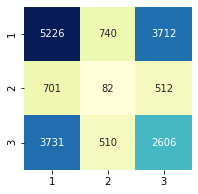

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, baseline_test)
conf_matrics = pd.DataFrame(data = cm, index=range(1,4), columns=range(1,4))
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrics, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

In [64]:
print(classification_report(Y_test, baseline_test))

                         precision    recall  f1-score   support

             functional       0.54      0.54      0.54      9678
functional needs repair       0.06      0.06      0.06      1295
         non functional       0.38      0.38      0.38      6847

               accuracy                           0.44     17820
              macro avg       0.33      0.33      0.33     17820
           weighted avg       0.44      0.44      0.44     17820



In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, Y_train)
X_test_scaled = scaler.transform(X_test)
LR = LogisticRegressionCV()
LR.fit(X_train_scaled, Y_train)
#LR_test = LR.predict(X_test) 

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

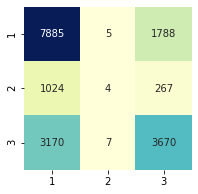

In [66]:
LR_train_pred = LR.predict(X_train_scaled) 
LR_test_pred = LR.predict(X_test_scaled) 
cm = confusion_matrix(Y_test, LR_test_pred)
conf_matrics = pd.DataFrame(data = cm, index=range(1,4), columns=range(1,4))
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrics, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

In [67]:
print(classification_report(Y_test, LR_test_pred))

                         precision    recall  f1-score   support

             functional       0.65      0.81      0.72      9678
functional needs repair       0.25      0.00      0.01      1295
         non functional       0.64      0.54      0.58      6847

               accuracy                           0.65     17820
              macro avg       0.51      0.45      0.44     17820
           weighted avg       0.62      0.65      0.62     17820



In [90]:
RF_clf = RandomForestClassifier(n_estimators=50)
RF_clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

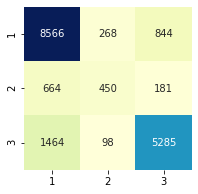

In [91]:
RF_train_pred = RF_clf.predict(X_train) 
RF_test_pred = RF_clf.predict(X_test) 
cm = confusion_matrix(Y_test, RF_test_pred)
conf_matrics = pd.DataFrame(data = cm, index=range(1,4), columns=range(1,4))
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrics, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

In [92]:
print(classification_report(Y_test, RF_test_pred))

                         precision    recall  f1-score   support

             functional       0.80      0.89      0.84      9678
functional needs repair       0.55      0.35      0.43      1295
         non functional       0.84      0.77      0.80      6847

               accuracy                           0.80     17820
              macro avg       0.73      0.67      0.69     17820
           weighted avg       0.80      0.80      0.80     17820

